# Student Performance Indicator

. Understanding the Problem Statement

. Data Collection

. Data Checks to perform

. Exploratory data analysis

. Data Pre-Processing


. Model Training

. Choose best model

# 1) Problem statement

. This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.

# 2) Data Collection


. Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977

. The data consists of 8 column and 1000 rows.

# 2.1 Import Data and Required Packages

. Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [23]:
data=pd.read_csv("StudentsPerformance.csv")
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### shape of the dataset

In [26]:
data.shape

(1000, 8)

#### Dataset Information 

. gender: Represents the student's gender (e.g., Male, Female).

. race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)

. parental level of education: Indicates the highest education level attained by a student's parents (e.g., associate's degree, master’s degree).

. lunch : having lunch before test (standard or free/reduced)

. test preparation course: Shows if a student completed or did not complete a test preparation

. math score

. reading score

. writing score 

# 3) Data Checks To Performs  

. Check missing values

. Check duplicates

. Check data types

. Check the number of unique value in each columns 

. Check stats info

. Check various categories present in datasets

In [58]:
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

#### There are no missing values present in the dataset.

In [61]:
data.duplicated().sum()

0

#### There are no duplicates in the dataset.

In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [66]:
data.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

# Statistics info of numerical columns 

In [76]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
math score,1000.0,66.089,15.163080,0.0,57.00,66.0,77.0,100.0
reading score,1000.0,69.169,14.600192,17.0,59.00,70.0,79.0,100.0
writing score,1000.0,68.054,15.195657,10.0,57.75,69.0,79.0,100.0


#### Insights 

. From above we can see that mean of all subjects are very close (66-68)

. Std are also very close between (15.16-15.19)

. In maths minimumu score is 0 ,in reading it's 17 which is higher than maths and in writing score the min marks is 10.

# Info of categorical columns 

In [74]:
data.describe(include="O").T

,count,unique,top,freq
gender,1000,2,female,518
race/ethnicity,1000,5,group C,319
parental level of education,1000,6,some college,226
lunch,1000,2,standard,645
test preparation course,1000,2,none,642


. from above we can see in gender there are 2 unique values and in race/ethinicity it's 5.

. In parental level of education there are 6 unique values and in lunch there are 2.

. In test prepararation course there are 2 unique values in dataset.

#### Checking unique values in categorical columns 

In [89]:
for col in data.columns:
    if data[col].dtypes=="O":
        print(f"categories in {col}--{data[col].unique()}")
        print("\n")

categories in gender--['female' 'male']


categories in race/ethnicity--['group B' 'group C' 'group A' 'group D' 'group E']


categories in parental level of education--["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']


categories in lunch--['standard' 'free/reduced']


categories in test preparation course--['none' 'completed']




In [93]:
#### Defining numerical and categorical columns 
numerical_columns=[col for col in data.columns if data[col].dtypes!="O"]
categorical_columns=[col for col in data.columns if data[col].dtypes=="O"]

print(f"We have {len(numerical_columns)} numerical columns in datset {numerical_columns}")
print(f"We have {len(categorical_columns)} categorical columns in datset {categorical_columns}")

We have 3 numerical columns in datset ['math score', 'reading score', 'writing score']
We have 5 categorical columns in datset ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [95]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### Adding columns for total score and average so that we can which featues are really important in scoring score....

In [105]:
data["Total Score"]=data["math score"]+data["reading score"]+data["writing score"]
data["Average Score"]=round(data["Total Score"]/3,2)

In [107]:
data.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total Score,Average Score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.67
1,female,group C,some college,standard,completed,69,90,88,247,82.33


In [119]:
math_full=len(data[data["math score"]==100])
reading_full=len(data[data["reading score"]==100])
writing_full=len(data[data["writing score"]==100])

print(f"Number of students with full marks in maths:{math_full}")
print(f"Number of students with full marks in reading:{reading_full}")
print(f"Number of students with full marks in writing:{writing_full}")

Number of students with full marks in maths:7
Number of students with full marks in reading:17
Number of students with full marks in writing:14


In [123]:
math_less_20=len(data[data["math score"]<20])
reading_less_20=len(data[data["reading score"]<20])
writing_less_20=len(data[data["writing score"]<20])

print(f"Number of students with less than 20 marks in maths:{math_less_20}")
print(f"Number of students with less than 20 marks in reading:{reading_less_20}")
print(f"Number of students with less than 20 marks in writing:{writing_less_20}")

Number of students with less than 20 marks in maths:4
Number of students with less than 20 marks in reading:1
Number of students with less than 20 marks in writing:3


. From above we can see students performed poorly in maths.

. Students performed very well in reading.

In [134]:
data.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total Score,Average Score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.67
1,female,group C,some college,standard,completed,69,90,88,247,82.33


# Visualization 

. Visualization of average score to make some conclusion.

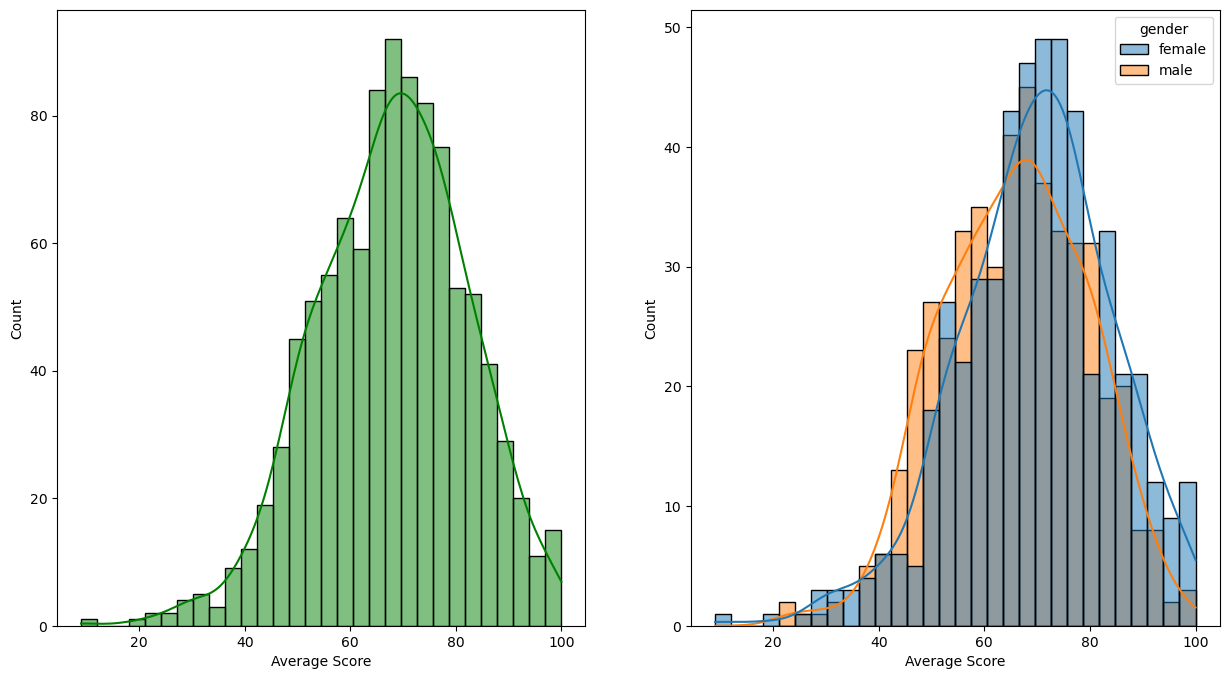

In [168]:
fig,axs=plt.subplots(1,2,figsize=(15,8))
sns.histplot(x="Average Score",bins=30,kde=True,color="g",data=data,ax=axs[0])
sns.histplot(x="Average Score",bins=30,kde=True,data=data,hue="gender",ax=axs[1])
plt.show()

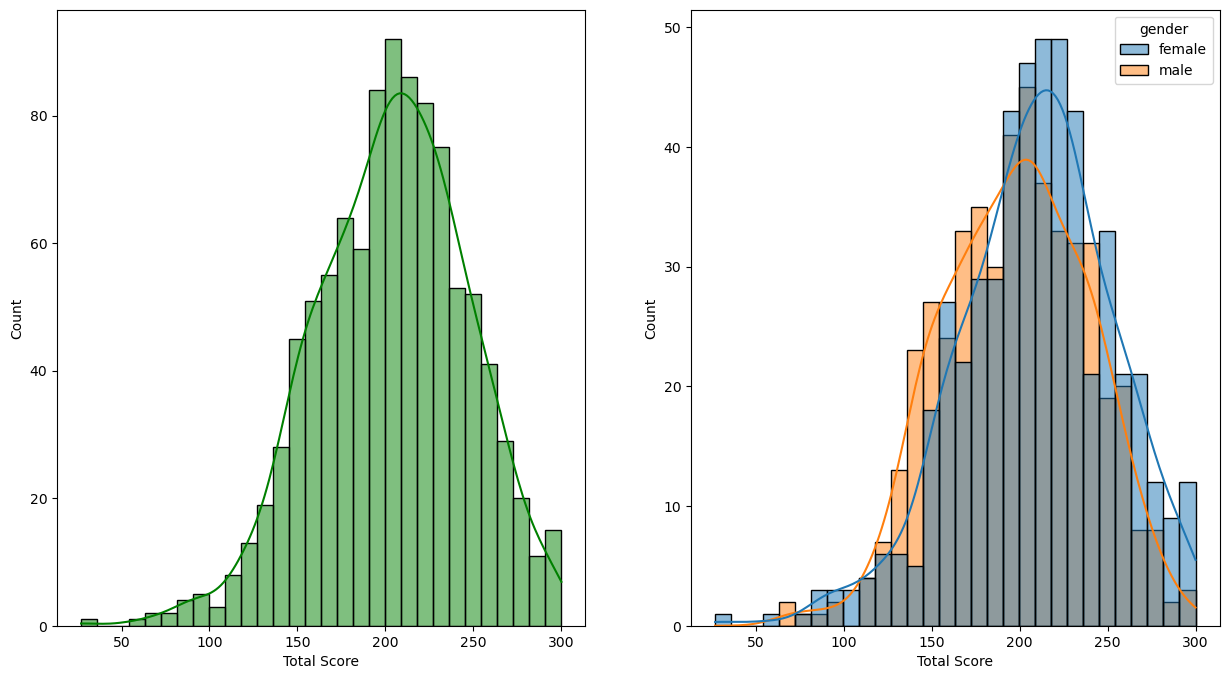

In [170]:
fig,axs=plt.subplots(1,2,figsize=(15,8))
sns.histplot(x="Total Score",bins=30,kde=True,color="g",data=data,ax=axs[0])
sns.histplot(x="Total Score",bins=30,kde=True,color="g",data=data,hue="gender",ax=axs[1])
plt.show()

#### Insights 

* Female performed better than male 

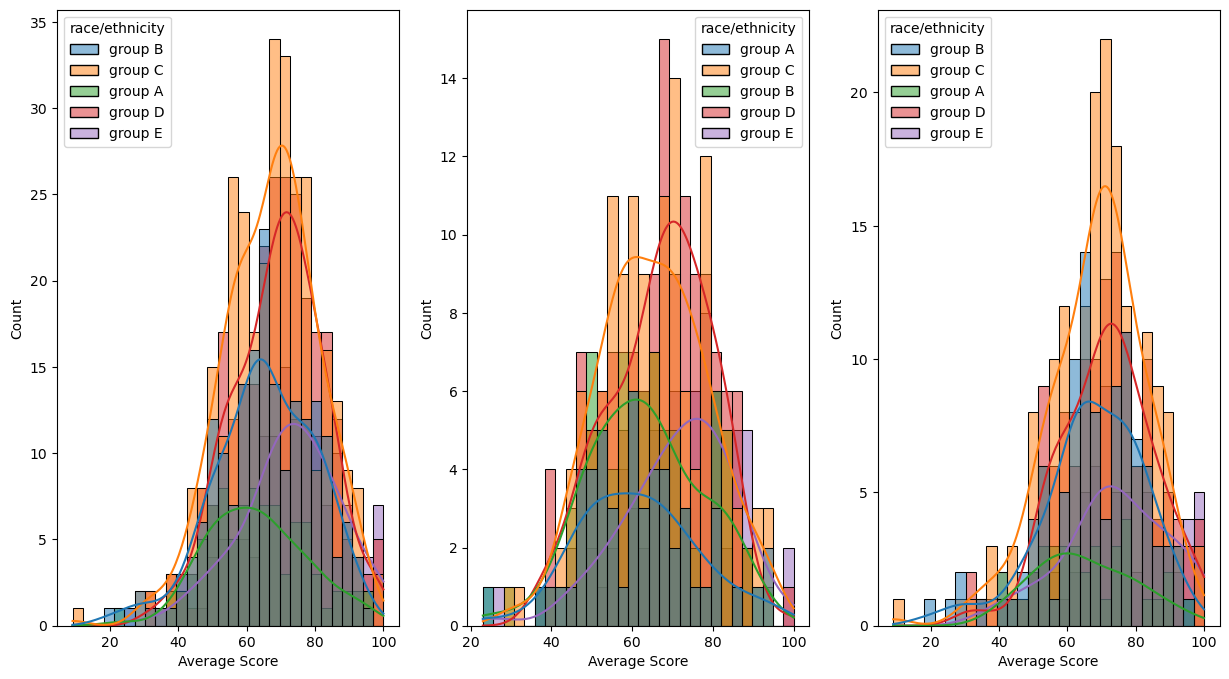

In [199]:
fig,axs=plt.subplots(1,3,figsize=(15,8))
sns.histplot(x="Average Score",bins=30,kde=True,data=data,ax=axs[0],hue="race/ethnicity")
sns.histplot(x="Average Score",bins=30,kde=True,data=data[data["gender"]=="male"],hue="race/ethnicity",ax=axs[1])
sns.histplot(x="Average Score",bins=30,kde=True,data=data[data["gender"]=="female"],hue="race/ethnicity",ax=axs[2])

plt.show()

#### Insights 

* Students of group A and group B tends to perform poorly in exam.

* Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female

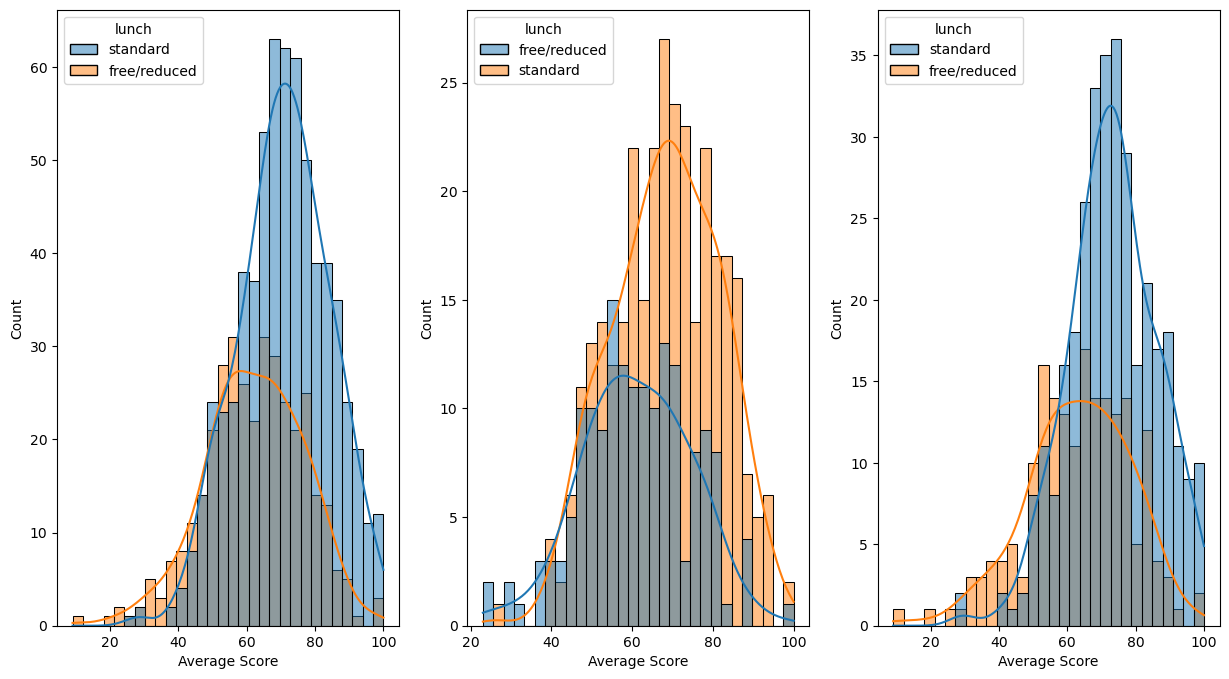

In [188]:
fig,axs=plt.subplots(1,3,figsize=(15,8))
sns.histplot(x="Average Score",bins=30,kde=True,data=data,ax=axs[0],hue="lunch")
sns.histplot(x="Average Score",bins=30,kde=True,data=data[data["gender"]=="male"],hue="lunch",ax=axs[1])
sns.histplot(x="Average Score",bins=30,kde=True,data=data[data["gender"]=="female"],hue="lunch",ax=axs[2])

plt.show()

#### Insights

* Standard lunch helps perform well in exam

* Standard lunch helps perform well in exam bein male or female 

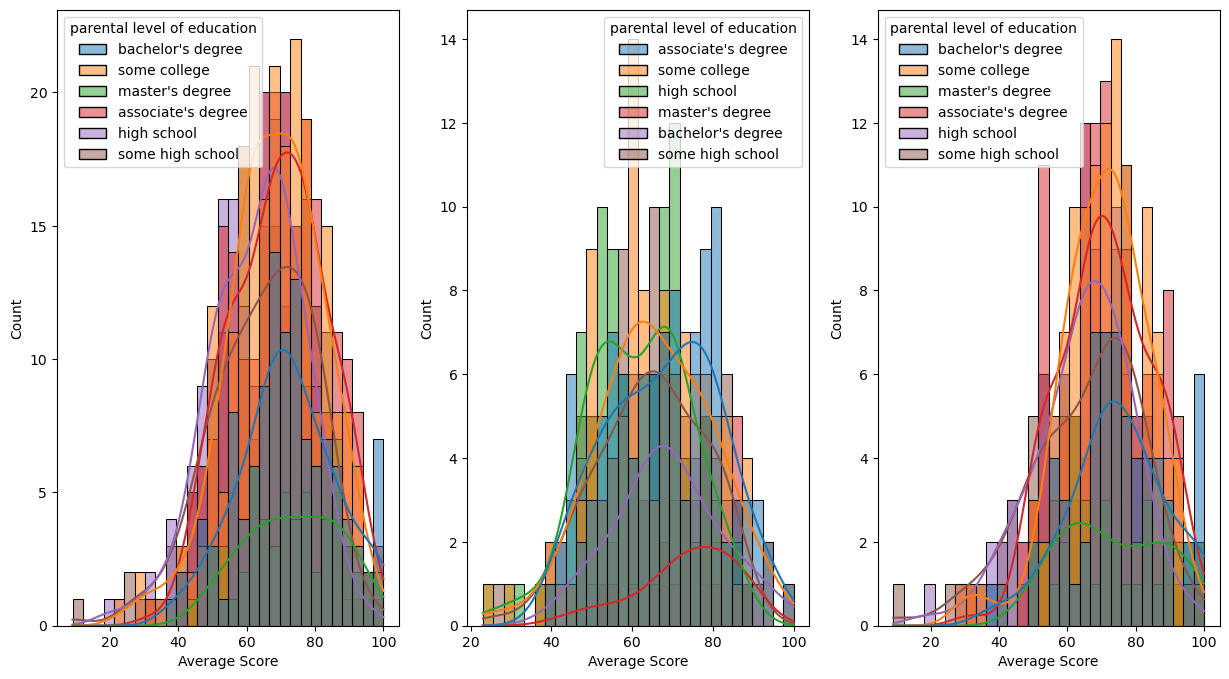

In [182]:
fig,axs=plt.subplots(1,3,figsize=(15,8))
sns.histplot(x="Average Score",bins=30,kde=True,data=data,ax=axs[0],hue="parental level of education")
sns.histplot(x="Average Score",bins=30,kde=True,data=data[data["gender"]=="male"],hue="parental level of education",ax=axs[1])
sns.histplot(x="Average Score",bins=30,kde=True,data=data[data["gender"]=="female"],hue="parental level of education",ax=axs[2])

plt.show() 

#### Insights 

* 2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam

* 3rd plot we can see there is no effect of parent's education on female students.

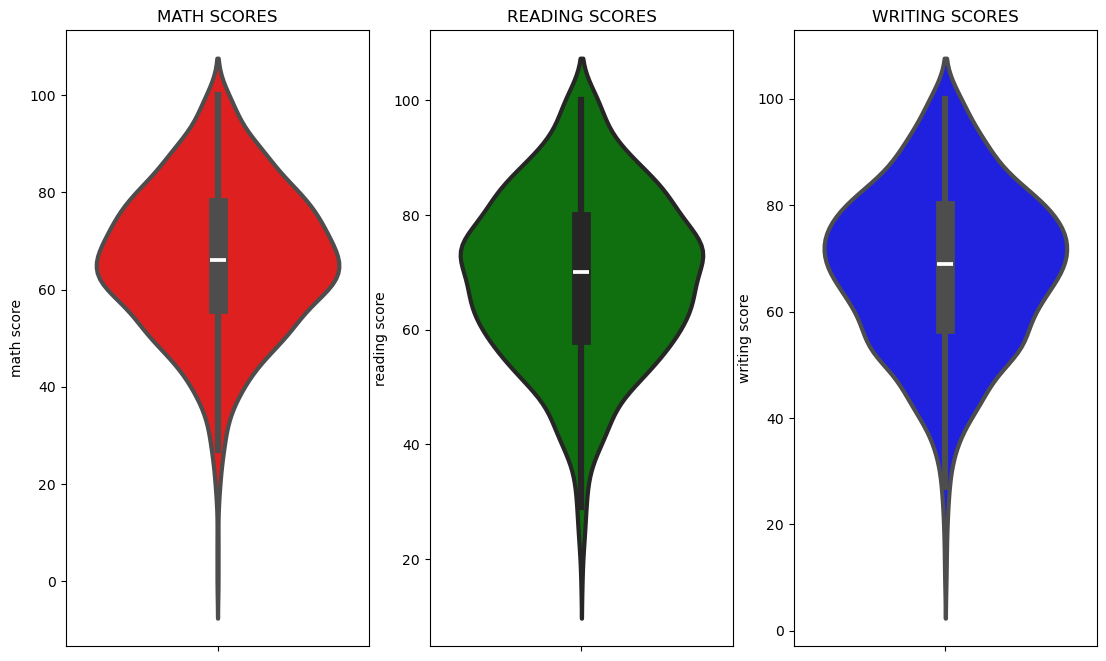

In [206]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math score',data=data,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading score',data=data,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing score',data=data,color='blue',linewidth=3)
plt.show()

#### Insights 

* From the above three plots its clearly visible that most of the students score in between approx 60-80 in all subjects.

In [213]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total Score,Average Score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.67
1,female,group C,some college,standard,completed,69,90,88,247,82.33
2,female,group B,master's degree,standard,none,90,95,93,278,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.33
4,male,group C,some college,standard,none,76,78,75,229,76.33


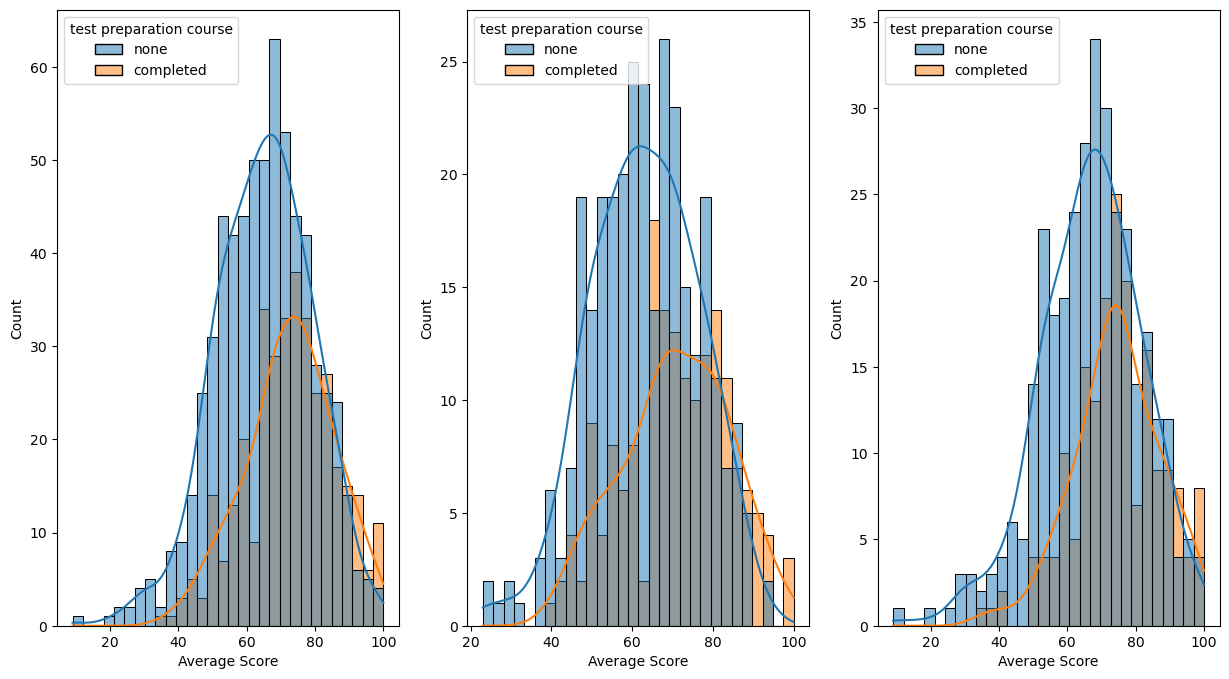

In [217]:
fig,axs=plt.subplots(1,3,figsize=(15,8))
sns.histplot(x="Average Score",bins=30,kde=True,data=data,ax=axs[0],hue="test preparation course")
sns.histplot(x="Average Score",bins=30,kde=True,data=data[data["gender"]=="male"],hue="test preparation course",ax=axs[1])
sns.histplot(x="Average Score",bins=30,kde=True,data=data[data["gender"]=="female"],hue="test preparation course",ax=axs[2])

plt.show()

#### Insights 

* Students who had completed their test preparation coarse they performed good.

# Checking Outliers 

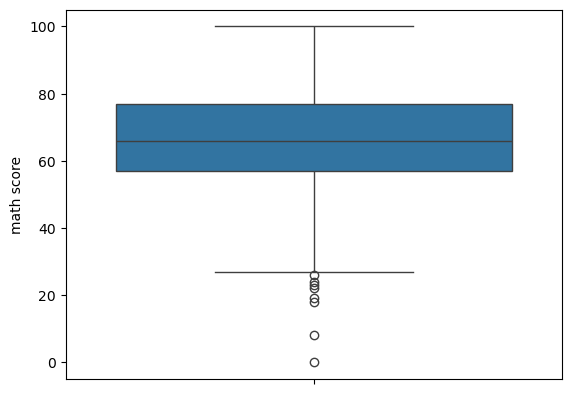

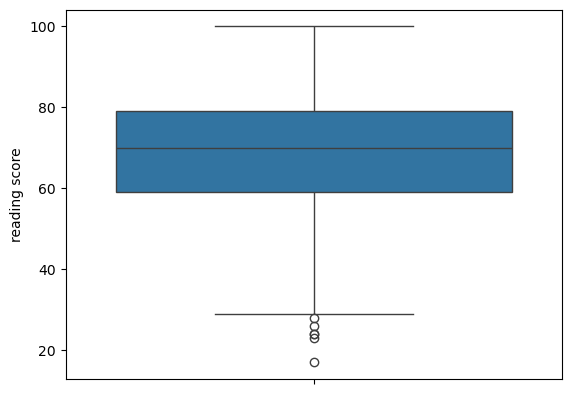

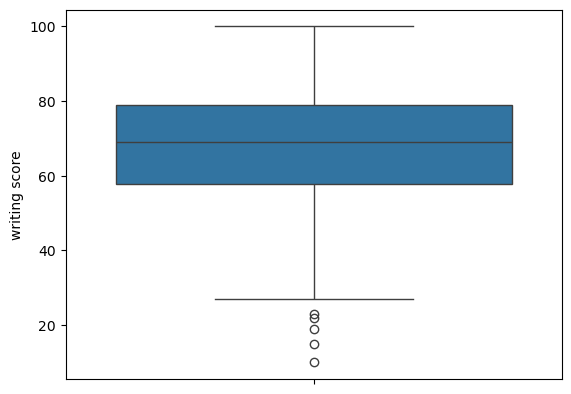

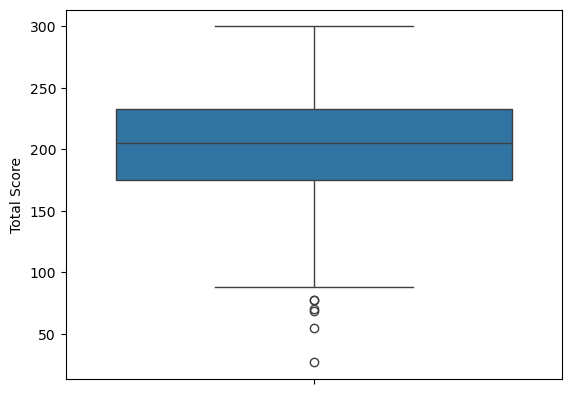

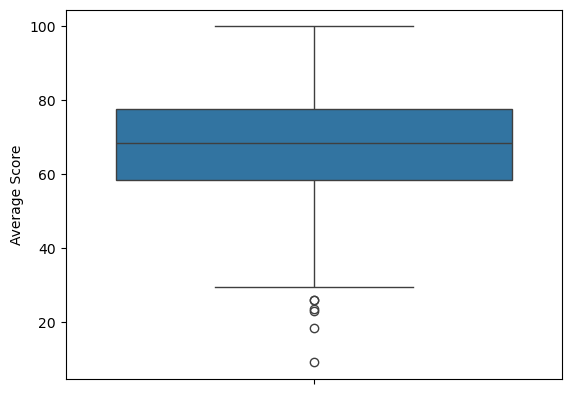

In [222]:
for col in data.columns:
    if data[col].dtypes!="O":
        sns.boxplot(data[col])
        plt.show()

#### Insights 

* There are some outliers present in all the scores.

# Checking Distributions

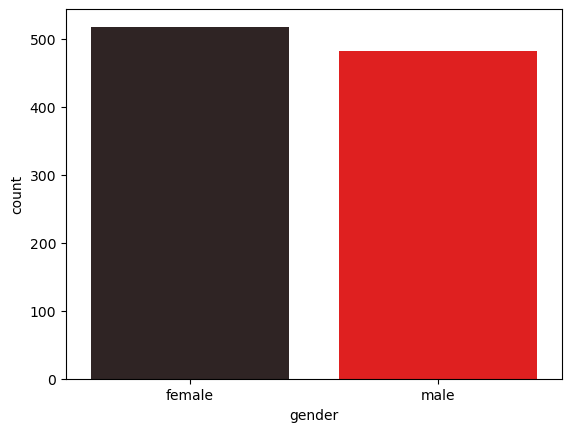

In [229]:
sns.countplot(x="gender",data=data,color="r",hue="gender")
plt.show()

#### Insights

* We have approx similar number of males and females.

In [231]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total Score,Average Score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.67
1,female,group C,some college,standard,completed,69,90,88,247,82.33
2,female,group B,master's degree,standard,none,90,95,93,278,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.33
4,male,group C,some college,standard,none,76,78,75,229,76.33


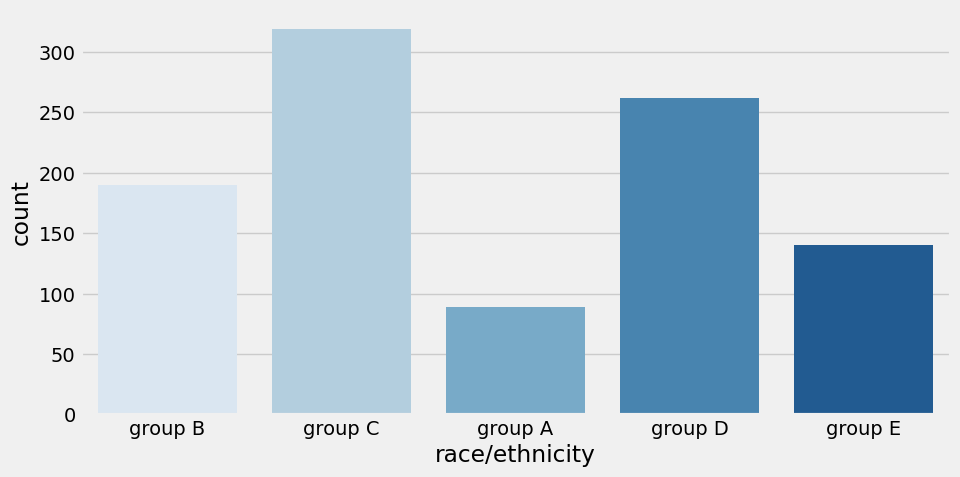

In [287]:
plt.figure(figsize=(10,5))
plt.style.use('fivethirtyeight')

sns.countplot(x="race/ethnicity",data=data,palette="Blues")
plt.show()

* Most of the students are belonging from group C while group A has least number of students.

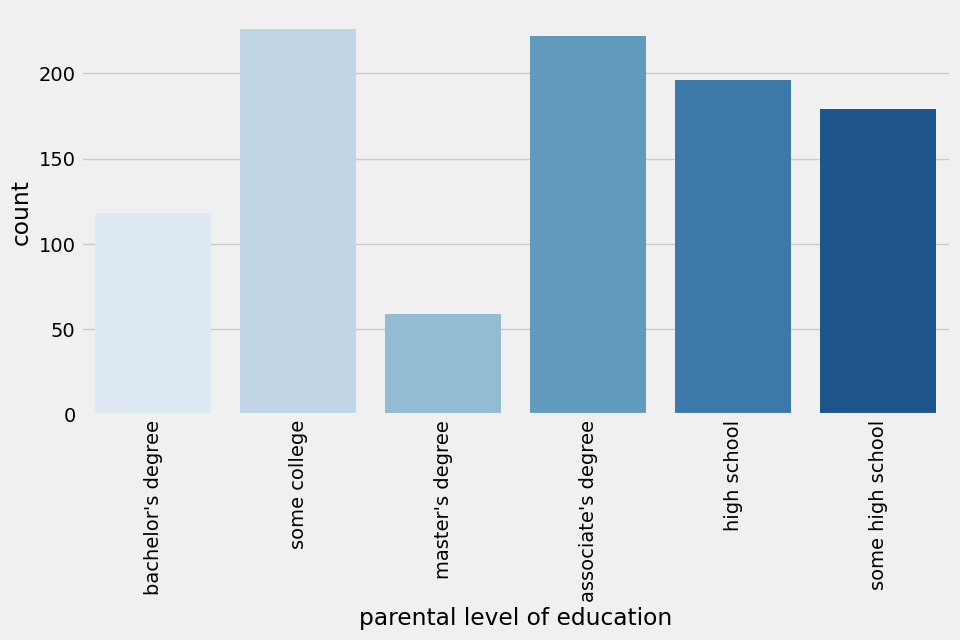

In [267]:
plt.figure(figsize=(10,5))
plt.style.use('fivethirtyeight')

sns.countplot(x="parental level of education",data=data,palette="Blues")
plt.xticks(rotation=90)
plt.show()

#### Insights

* Large number of parents from some college.

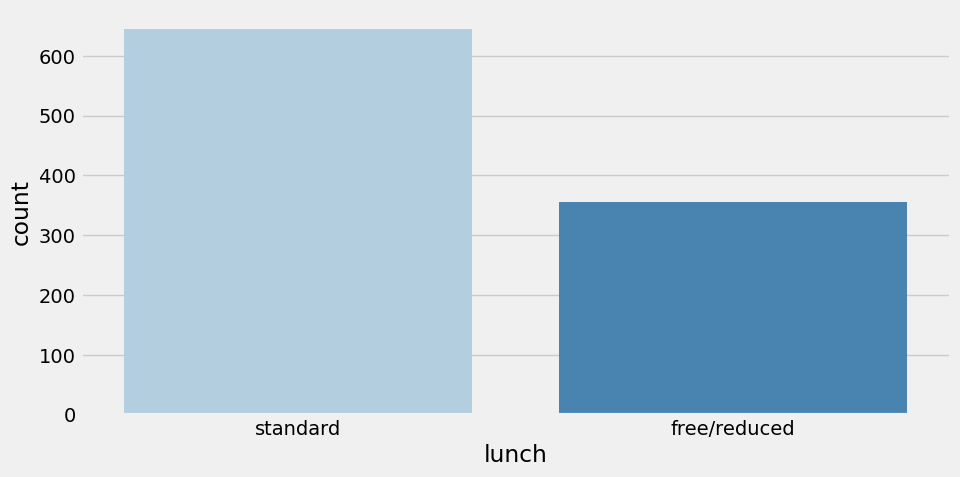

In [274]:
plt.figure(figsize=(10,5))
plt.style.use('fivethirtyeight')

sns.countplot(x="lunch",data=data,palette="Blues")
plt.show()

#### Insights 

In [ ]:
* Standard lunch is more common.

In [279]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total Score,Average Score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.67
1,female,group C,some college,standard,completed,69,90,88,247,82.33
2,female,group B,master's degree,standard,none,90,95,93,278,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.33
4,male,group C,some college,standard,none,76,78,75,229,76.33


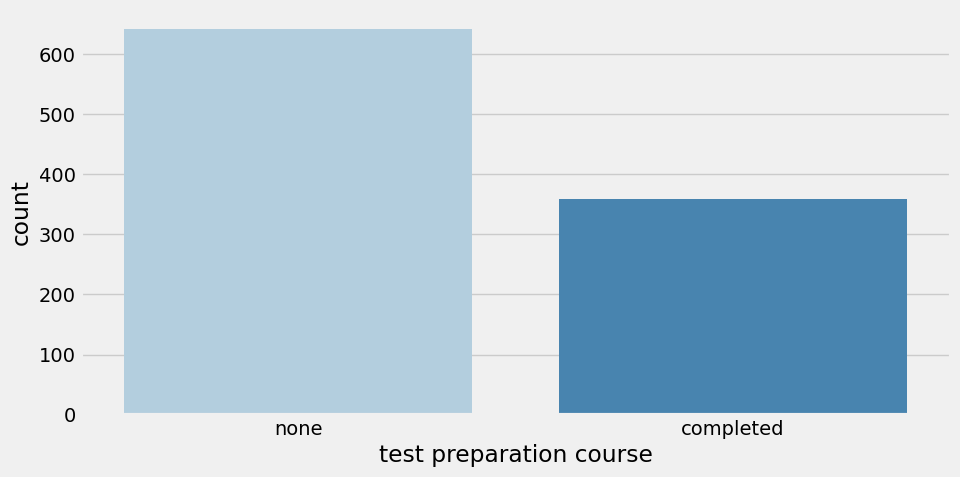

In [295]:
plt.figure(figsize=(10,5))
plt.style.use('fivethirtyeight')

sns.countplot(x="test preparation course",data=data,palette="Blues")
plt.show()

#### Insights

* Most of the students had not taken test preparation course.

# BIVARIATE ANALYSIS

In [299]:
data.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total Score,Average Score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.67
1,female,group C,some college,standard,completed,69,90,88,247,82.33


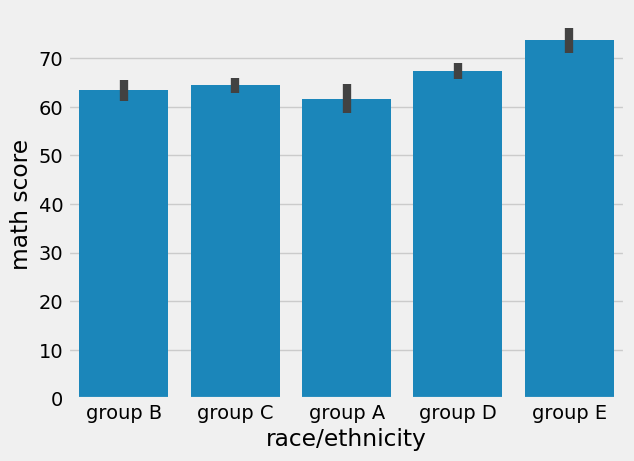

In [301]:
sns.barplot(x="race/ethnicity",y="math score",data=data)
plt.show()

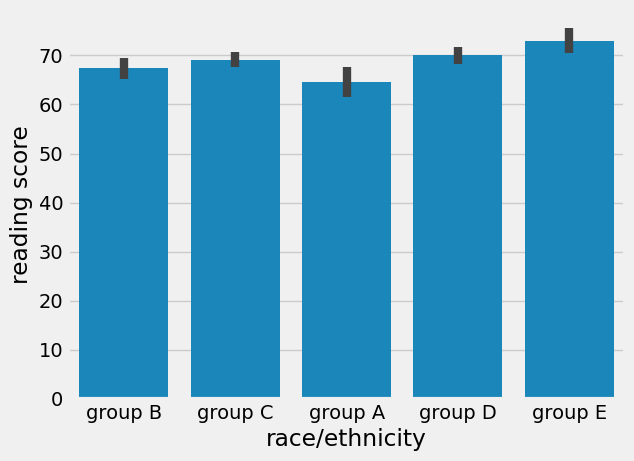

In [304]:
sns.barplot(x="race/ethnicity",y="reading score",data=data)
plt.show()

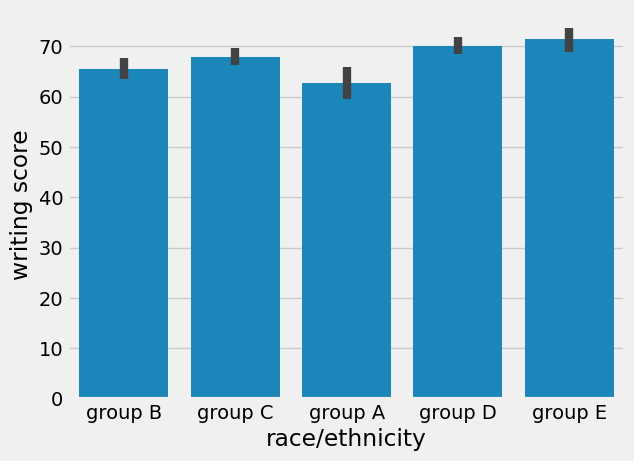

In [307]:
sns.barplot(x="race/ethnicity",y="writing score",data=data)
plt.show()

#### Insights

* Group E students scored good in all subjects.

# Final Conclusion 

* Student's Performance is related with lunch, race, parental level education

* Females lead in pass percentage and also are top-scorers

* Finishing preparation course is benefitial.

 * Group E students are performing good in all subjects.

* Standard lunch is helping students to perform good